In [4]:
!pip3 install essentia

     |████████████████████████████████| 12.0MB 267kB/s 


In [5]:
# first, we need to import our essentia module. It is aptly named 'essentia'!
import essentia

# as there are 2 operating modes in essentia which have the same algorithms,
# these latter are dispatched into 2 submodules:
import essentia.standard
import essentia.streaming

# let's have a look at what is in there
print(dir(essentia.standard))

# you can also do it by using autocompletion in IPython, typing "essentia.standard." and pressing Tab
    

['AfterMaxToBeforeMaxEnergyRatio', 'AllPass', 'AudioLoader', 'AudioOnsetsMarker', 'AudioWriter', 'AutoCorrelation', 'BFCC', 'BPF', 'BandPass', 'BandReject', 'BarkBands', 'BeatTrackerDegara', 'BeatTrackerMultiFeature', 'Beatogram', 'BeatsLoudness', 'BinaryOperator', 'BinaryOperatorStream', 'BpmHistogram', 'BpmHistogramDescriptors', 'BpmRubato', 'CartesianToPolar', 'CentralMoments', 'Centroid', 'ChordsDescriptors', 'ChordsDetection', 'ChordsDetectionBeats', 'ChromaCrossSimilarity', 'Chromagram', 'Chromaprinter', 'ClickDetector', 'Clipper', 'ConstantQ', 'CoverSongSimilarity', 'Crest', 'CrossCorrelation', 'CrossSimilarityMatrix', 'CubicSpline', 'DCRemoval', 'DCT', 'Danceability', 'Decrease', 'Derivative', 'DerivativeSFX', 'DiscontinuityDetector', 'Dissonance', 'DistributionShape', 'Duration', 'DynamicComplexity', 'ERBBands', 'EasyLoader', 'EffectiveDuration', 'Energy', 'EnergyBand', 'EnergyBandRatio', 'Entropy', 'Envelope', 'EqloudLoader', 'EqualLoudness', 'Extractor', 'FFT', 'FFTC', 'Fade

In [6]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = '/content/drive/Thesis'
query_music_path = '/content/drive/Thesis'

import pandas as pd
import sys
sys.path.append('/content/drive/Thesis')
sys.path.append('/content/drive/MIR_FINAL/songs/bass0')
sys.path.append('/content/drive/MIR_FINAL/songs/bass1')
sys.path.append('/content/drive/MIR_FINAL/songs/bass2')
sys.path.append('/content/drive/MIR_FINAL/songs/bass3')

Mounted at /content/drive


In [7]:
import os
from essentia.standard import *
from essentia import Pool, array
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [8]:
fs=44100
durInSecs=14.51
durInSecs2=12
soundsDir = ''

frameSize = 1024*2
hopSize = 512*2
#fileName = os.path.join(soundsDir, file)
theBJ_GT_part1 = 'drive/MyDrive/TrinityRecordings/2_bassX_Billie Jean_Michael Jackson_BassGr1_part1.wav'
theBJ_GT_part2 = 'drive/MyDrive/TrinityRecordings/2_bassX_Billie Jean_Michael Jackson_BassGr1_part2.wav'
#2_bassX_Billie Jean_Michael Jackson_BassGr1.wav
theYellow =  'drive/MyDrive/MIR_FINAL/songs/bass0/2_bassX_Yellow_Coldplay_Bass Gr0.wav'
theJust =  'drive/MyDrive/MIR_FINAL/songs/bass1/2_bassX_Just Looking_Stereophonics_BassGr1.wav'
theBrown =  'drive/MyDrive/MIR_FINAL/songs/bass2/2_bassX_Brown Eyed Girl_Van Morrison_BassGr2.wav'
theWalk =  'drive/MyDrive/MIR_FINAL/songs/bass3/2_bassX_Walking On The Moon_The Police_Bass Gr3.wav'
theRoad =  'drive/MyDrive/MIR_FINAL/songs/bass3/2_bassX_(I_m A) Road Runner_Jr Walker & The Allstars_Bass Gr3.wav'

theBrown1 =  'drive/MyDrive/TrinityRecordings/brown1.wav'
theBrown2 =  'drive/MyDrive/TrinityRecordings/brown2.wav'
theBrown3 =  'drive/MyDrive/TrinityRecordings/brown3.wav'





In [9]:

theBrownOffset1 = 100
theBrownOffset2 = 100
theBrownOffset3 = 85
theBrownOffset4 = 100
theBrownOffset5 = 85
theBrownOffset6 = 85
theBrownOffset7 = 70
theBrownOffset8 = 70

theBrownOnset1 = 70
theBrownOnset2 = 85
theBrownOnset3 = 85
theBrownOnset4 = 100
theBrownOnset5 =70
theBrownOnset6 = 70
theBrownOnset7 = 85
theBrownOnset8 =85

# Groove Rests and Silences Accuracy

theBrownGroove1 =70
theBrownGroove2 =85
theBrownGroove3 =85
theBrownGroove4 =100
theBrownGroove5 =85
theBrownGroove6 =85
theBrownGroove7 =85
theBrownGroove8 =40


In [13]:
durInSecs=8.5
brown = MonoLoader(filename = theBrown, sampleRate = fs)()
brown =brown[int(fs*3):int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
brown= brown / np.max(np.abs(brown))

latency=2*fs
brown1 = MonoLoader(filename = theBrown1, sampleRate = fs)()
brown2 = MonoLoader(filename = theBrown2, sampleRate = fs)()
brown3 = MonoLoader(filename = theBrown3, sampleRate = fs)()
brown1= brown1[int(fs*1.8):]
brown2= brown2[int(fs*1.8):]
brown3= brown3[int(fs*1.8):]

In [14]:

brown1 = brown1[int(fs*3):int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
brown1 = brown1 / np.max(np.abs(brown1))
brown2 = brown2[int(fs*3):int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
brown2 = brown2 / np.max(np.abs(brown2))
brown3 =brown3[int(fs*3):int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
brown3= brown3 / np.max(np.abs(brown3))

In [17]:
def calculate_offset(x,threshold,frameSize,hopSize):
  rms_bands = []
  for fstart in range(0, len(x)-frameSize, hopSize):
    frame = x[fstart:fstart+frameSize]
    rms_output= RMS()(frame)
    rms_bands.append(rms_output)
  index= 0
  array_of_time_offsets= []
  flag = False
  last_index=0
  while index < len(rms_bands):
    if rms_bands[index]<threshold and flag == False :
      point= (index*hopSize)/44100
      array_of_time_offsets.append(point)
      print("DBG",point)
      flag = True
      last_index=index
    index+=1
    #We set flag back to false after determined time epriod
    increment_factor= int(hopSize/40) #
    if index > last_index+increment_factor:
      flag = False
  a= array(array_of_time_offsets)
  fs=44100
  the_len= int(len(x)/hopSize)
  rms_bands1 = rms_bands[:the_len]
  return(rms_bands1,a)

DBG 0.0
DBG 0.9752380952380952
DBG 1.5789569160997732
DBG 3.297233560090703
DBG 3.947392290249433
DBG 5.131609977324263
The offset positions for Ground Truth 
6
[0.        0.9752381 1.578957  3.2972336 3.9473922 5.13161  ]


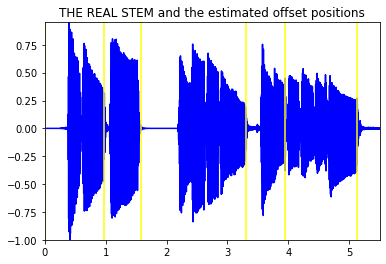

In [23]:
rms, output=calculate_offset(brown,0.1,frameSize,hopSize)
plt.plot(np.arange(brown.size)/float(fs), brown,'b')
plt.axis([0,brown.size/float(fs),min(brown),max(brown)])
print("The offset positions for Ground Truth ")
print(len(output))
print(output)
for i in output:
    plt.axvline(x=i, color='yellow')
plt.title("THE REAL STEM and the estimated offset positions")
scale_factor= (len(brown)/len(rms))
plt.show()
ipd.Audio(brown,rate=44100)


DBG 0.0
DBG 0.9984580498866213
DBG 1.6021768707482993
DBG 2.6006349206349206
DBG 3.2043537414965986
DBG 3.9706122448979593
DBG 4.6439909297052155
DBG 5.2477097505668935
The offset positions for Ground Truth 
8
[0.        0.998458  1.6021769 2.6006348 3.2043538 3.9706123 4.643991
 5.2477098]


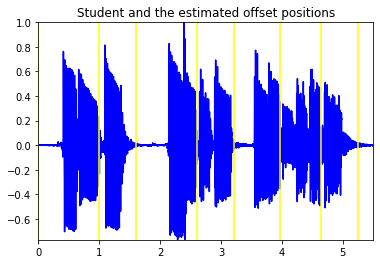

In [22]:
rms, output=calculate_offset(brown1,0.1,frameSize,hopSize)
plt.plot(np.arange(brown1.size)/float(fs), brown1,'b')
plt.axis([0,brown1.size/float(fs),min(brown1),max(brown1)])
print("The offset positions for Ground Truth ")
print(len(output))
print(output)
for i in output:
    plt.axvline(x=i, color='yellow')
plt.title("Student and the estimated offset positions")
scale_factor= (len(brown1)/len(rms))
plt.show()
ipd.Audio(brown,rate=44100)

In [ ]:
### 

2nd Task , when godd enough algorithm for student transcription
-- Map the distance to the grade

Based on onset measurements predict the grade
--- Function to do a difference

